# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt



# Membaca Dataset

In [2]:
df_rating = pd.read_csv('data/tourism_rating.csv')
df_wisata = pd.read_csv('data/tourism_with_id.csv')

In [3]:
# menampilkan 5 data teratas

df_rating.head()

,IdUser,IdWisata,rating
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [4]:
# menampilkan 5 data teratas

df_wisata.head()

,IdWisata,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
# membuang kolom yang tidak diperlukan

df_wisata.drop(['Unnamed: 11', 'Unnamed: 12', 'Lat', 'Long', 'Coordinate', 'Time_Minutes'], axis=1, inplace=True)

In [6]:
df_wisata.head()

,IdWisata,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5


In [7]:
# memilih hanya kota Yogyakarta saja

df_wisata = df_wisata[df_wisata['City'] == 'Yogyakarta']

# Exploratory Data Analysis

In [8]:
# menggabungkan kedua dataframe

df = pd.merge(df_rating, df_wisata, on='IdWisata')

df.head(10)

,IdUser,IdWisata,rating,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
5,76,179,1,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
6,84,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
7,127,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
8,127,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
9,134,179,2,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6


In [9]:
# menampilkan informasi pada data yang sudah digabungkan

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2871 entries, 0 to 2870
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdUser        2871 non-null   int64  
 1   IdWisata       2871 non-null   int64  
 2   rating  2871 non-null   int64  
 3   Place_Name     2871 non-null   object 
 4   Description    2871 non-null   object 
 5   Category       2871 non-null   object 
 6   City           2871 non-null   object 
 7   Price          2871 non-null   int64  
 8   Rating         2871 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 224.3+ KB


In [10]:
# Melihat nilai null pada data

df.isnull().sum()

IdUser          0
IdWisata         0
rating    0
Place_Name       0
Description      0
Category         0
City             0
Price            0
Rating           0
dtype: int64

In [11]:
# Melihat data unique pada kolom rating,price,dan kategori

print("Data unik pada data rating: ", df['Rating'].unique())

print("Data unik pada data price: ", df['Price'].unique())

print("Data unik pada data kategori: ", df['Category'].unique())

Data unik pada data rating:  [4.6 4.  4.5 4.7 4.4 4.3 5.  4.1 4.2 4.8]
Data unik pada data price:  [ 75000      0  10000  50000   6000   3000   5000  15000  20000   2500
   2000   4000  40000 150000   8000   7000  30000  25000 220000  60000
 500000 250000  22000 100000]
Data unik pada data kategori:  ['Budaya' 'Bahari' 'Taman Hiburan' 'Cagar Alam' 'Pusat Perbelanjaan']


In [12]:
# see count of each price

df['Price'].value_counts()

# sort the price

df['Price'].value_counts().sort_index()

0         579
2000       63
2500      108
3000      181
4000       47
5000      510
6000       46
7000       44
8000       22
10000     621
15000     133
20000     105
22000      21
25000      17
30000      31
40000      73
50000     113
60000      24
75000      24
100000     12
150000     29
220000     22
250000     25
500000     21
Name: Price, dtype: int64

In [13]:
"""
I want to normalize df['Rating'] data so that the value is between 0 until 5 because the rating value is between 0 until 5. 

I want to change the label become like this:

4.0 , 4.1 ==> 1,
4.2, 4.3 ==> 2,
4.4, 4.5 ==> 3,
4.6, 4.7 ==> 4,
4.8, 4.9, 5.0 ==> 5
"""

# change the label

df['Rating'] = df['Rating'].replace([4.0, 4.1], 0)
df['Rating'] = df['Rating'].replace([4.2, 4.3], 1)
df['Rating'] = df['Rating'].replace([4.4, 4.5], 2)
df['Rating'] = df['Rating'].replace([4.6, 4.7], 3)
df['Rating'] = df['Rating'].replace([4.8, 4.9, 5.0], 4)


# convert data to int

df["Rating"] = df["Rating"].astype(int)

df


,IdUser,IdWisata,rating,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,3
...,...,...,...,...,...,...,...,...,...
2866,240,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3
2867,247,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3
2868,261,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3
2869,267,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,3


/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


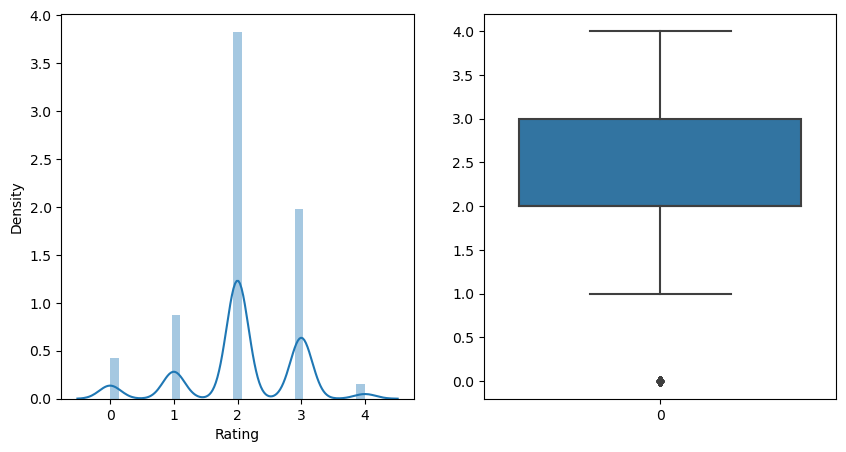

In [14]:
# Memvisualisasikan data rating dengan menggunakan histogram dan boxplot untuk melihat persebaran data dan pencilan data pada kolom rating 

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Rating'])
plt.subplot(1, 2, 2)
sns.boxplot(df['Rating'])
plt.show()



/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


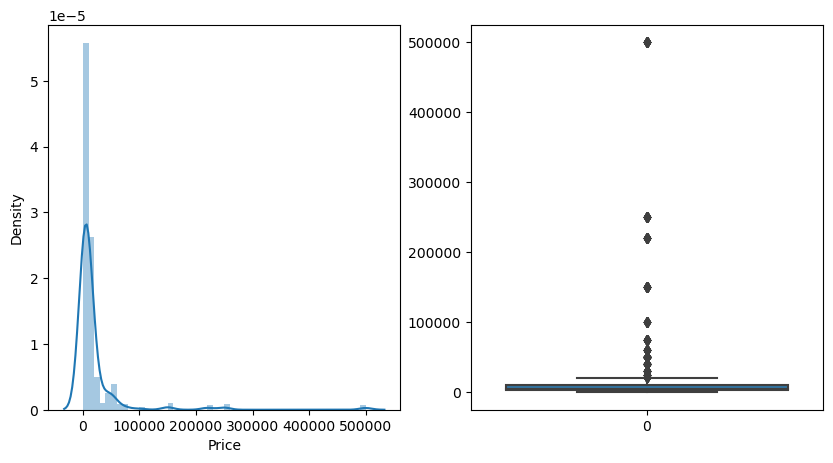

In [15]:
# Memvisualisasikan data price dengan menggunakan histogram dan boxplot untuk melihat persebaran data dan pencilan data pada kolom price

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Price'])
plt.subplot(1, 2, 2)
sns.boxplot(df['Price'])

plt.show()

# Data Preprocessing

In [16]:
# Membuat pemodelan dengan kolom Category, Rating, dan Price 

df_model = df[['Category', 'Rating', 'Price']]

df_model.head()



,Category,Rating,Price
0,Budaya,3,75000
1,Budaya,3,75000
2,Budaya,3,75000
3,Budaya,3,75000
4,Budaya,3,75000


In [17]:
# Membuat rentang harga untuk memudahkan dalam proses pemodelan 

# harga 0 - 3000 dilabel menjadi 0 dst

df_model['Price'] = df_model['Price'].replace(range(0, 3000), 0)



df_model['Price'] = df_model['Price'].replace(range(4000, 7000), 1)


df_model['Price'] = df_model['Price'].replace(range(8000, 20000), 2)


df_model['Price'] = df_model['Price'].replace(range(22000, 400000), 3)



df_model['Price'] = df_model['Price'].replace(range(50000, 100000), 4)



df_model['Price'] = df_model['Price'].replace(range(150000, 500000), 5)

/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [18]:
"""
I want to normalize df['Rating'] data so that the value is between 0 until 5 because the rating value is between 0 until 5. 

I want to change the label become like this:

4.0 , 4.1 ==> 1,
4.2, 4.3 ==> 2,
4.4, 4.5 ==> 3,
4.6, 4.7 ==> 4,
4.8, 4.9, 5.0 ==> 5
"""

# change the label

df_model['Rating'] = df_model['Rating'].replace([4.0, 4.1], 0)
df_model['Rating'] = df_model['Rating'].replace([4.2, 4.3], 1)
df_model['Rating'] = df_model['Rating'].replace([4.4, 4.5], 2)
df_model['Rating'] = df_model['Rating'].replace([4.6, 4.7], 3)
df_model['Rating'] = df_model['Rating'].replace([4.8, 4.9, 5.0], 4)


# convert data to int

df_model["Rating"] = df_model["Rating"].astype(int)

df_model


/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Category,Rating,Price
0,Budaya,3,3
1,Budaya,3,3
2,Budaya,3,3
3,Budaya,3,3
4,Budaya,3,3
...,...,...,...
2866,Taman Hiburan,3,0
2867,Taman Hiburan,3,0
2868,Taman Hiburan,3,0
2869,Taman Hiburan,3,0


In [19]:
# Melakukan label encoding pada kolom Category

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_model['Category'] = label_encoder.fit_transform(df_model['Category'])

df_model.head()

/home/abdulhafidh/anaconda3/envs/tf210/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Category,Rating,Price
0,1,3,3
1,1,3,3
2,1,3,3
3,1,3,3
4,1,3,3


In [20]:
# see category unique

print("Data unik pada data kategori: ", df['Category'].unique())

# print data untuk kategori  cagar alam

df[df['Category'] == "Pusat Perbelanjaan"]






Data unik pada data kategori:  ['Budaya' 'Bahari' 'Taman Hiburan' 'Cagar Alam' 'Pusat Perbelanjaan']


,IdUser,IdWisata,rating,Place_Name,Description,Category,City,Price,Rating
2312,22,135,3,Kawasan Wisata Sosrowijayan,Tempat wisata Sosrowijayan memang selama ini d...,Pusat Perbelanjaan,Yogyakarta,0,0
2313,44,135,3,Kawasan Wisata Sosrowijayan,Tempat wisata Sosrowijayan memang selama ini d...,Pusat Perbelanjaan,Yogyakarta,0,0
2314,53,135,5,Kawasan Wisata Sosrowijayan,Tempat wisata Sosrowijayan memang selama ini d...,Pusat Perbelanjaan,Yogyakarta,0,0
2315,54,135,2,Kawasan Wisata Sosrowijayan,Tempat wisata Sosrowijayan memang selama ini d...,Pusat Perbelanjaan,Yogyakarta,0,0
2316,57,135,4,Kawasan Wisata Sosrowijayan,Tempat wisata Sosrowijayan memang selama ini d...,Pusat Perbelanjaan,Yogyakarta,0,0
...,...,...,...,...,...,...,...,...,...
2568,276,174,1,Pasar Beringharjo,"Pasar Beringharjo (bahasa Jawa: ꦥꦱꦂꦧꦼꦫꦶꦁꦲꦂꦗ, t...",Pusat Perbelanjaan,Yogyakarta,0,2
2569,277,174,1,Pasar Beringharjo,"Pasar Beringharjo (bahasa Jawa: ꦥꦱꦂꦧꦼꦫꦶꦁꦲꦂꦗ, t...",Pusat Perbelanjaan,Yogyakarta,0,2
2570,283,174,2,Pasar Beringharjo,"Pasar Beringharjo (bahasa Jawa: ꦥꦱꦂꦧꦼꦫꦶꦁꦲꦂꦗ, t...",Pusat Perbelanjaan,Yogyakarta,0,2
2571,288,174,2,Pasar Beringharjo,"Pasar Beringharjo (bahasa Jawa: ꦥꦱꦂꦧꦼꦫꦶꦁꦲꦂꦗ, t...",Pusat Perbelanjaan,Yogyakarta,0,2


In [21]:
df_model.iloc[2316]

Category    3
Rating      0
Price       0
Name: 2316, dtype: int64

In [22]:
# Memilih rating sebagai target dan sisanya sebagai fitur

X = df_model.drop('Rating', axis=1)

y = df_model['Rating']





In [23]:
# Membagi data menjadi data training dan data testing dengan test size 20% dan random state 0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)



# Melatih Model

In [24]:
# Membuat model machine learning dengan menggunakan algoritma deep learning yaitu neural network menggunakan tensorflow

model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(32, activation='relu'),

    # karena ini merupakan masalah klasifikasi multiclass maka pada layer output menggunakan activation softmax dan class nya ada 5 

    tf.keras.layers.Dense(6, activation='softmax')

])

# Menggunakan optimizer adam dan loss function serta menggunakan metrics accuracy

# mengeset learning rate menjadi 0.001

optimizer = tf.keras.optimizers.Adam(0.001)

loss = tf.keras.losses.SparseCategoricalCrossentropy()


model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# melihat summary dari model yang telah dibuat
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 10,918
Trainable params: 10,918
Non-trainable params: 0
_________________________________________________________________


2023-06-11 20:08:12.103048: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-11 20:08:12.103103: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-11 20:08:12.103143: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (abdulhafidh): /proc/driver/nvidia/version does not exist
2023-06-11 20:08:12.103697: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-06-11 20:08:12.122299: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 1599960000 Hz
2023-06-11 20:08:12.123578: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff224000b70 initialized for platform Host (this does not guarantee tha

In [25]:
# Melakukan training model dengan data training yang telah dibagi sebelumnya dengan jumlah epoch 100 dan batch size 32

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64)


Epoch 1/200
36/36 [==============================] - 1s 17ms/step - loss: 133.6436 - accuracy: 0.3698 - val_loss: 14.6788 - val_accuracy: 0.4783
Epoch 2/200
36/36 [==============================] - 0s 5ms/step - loss: 17.9979 - accuracy: 0.4961 - val_loss: 31.3387 - val_accuracy: 0.5270
Epoch 3/200
36/36 [==============================] - 0s 5ms/step - loss: 39.0842 - accuracy: 0.4904 - val_loss: 52.6052 - val_accuracy: 0.4783
Epoch 4/200
36/36 [==============================] - 0s 5ms/step - loss: 39.6782 - accuracy: 0.4830 - val_loss: 25.2875 - val_accuracy: 0.4783
Epoch 5/200
36/36 [==============================] - 0s 5ms/step - loss: 17.8594 - accuracy: 0.4852 - val_loss: 19.8080 - val_accuracy: 0.4783
Epoch 6/200
36/36 [==============================] - 0s 6ms/step - loss: 16.1599 - accuracy: 0.4882 - val_loss: 10.3520 - val_accuracy: 0.4348
Epoch 7/200
36/36 [==============================] - 0s 5ms/step - loss: 6.6066 - accuracy: 0.4852 - val_loss: 11.3896 - val_accuracy: 0.445

# Convert Model to TFLite

In [26]:
# COnvert Model to TFLite with quantization

converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()


open("filtering_model.tflite", "wb").write(tflite_model)



2023-06-11 20:08:55.443484: I tensorflow/core/grappler/devices.cc:55] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-06-11 20:08:55.443776: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2023-06-11 20:08:55.447658: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:797] Optimization results for grappler item: graph_to_optimize
2023-06-11 20:08:55.447714: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:799]   function_optimizer: function_optimizer did nothing. time = 0.005ms.
2023-06-11 20:08:55.447727: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:799]   function_optimizer: function_optimizer did nothing. time = 0.001ms.
2023-06-11 20:08:55.780158: I tensorflow/core/grappler/devices.cc:55] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2023-06-11 20:08:55.780386: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2023-06-11 20:08:55.788654: I tenso

15104